# CNN

Contoh Implementasi CNN untuk klasifikasi kamar clean dan messy

dataset:
https://www.kaggle.com/datasets/cdawn1/messy-vs-clean-room

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
!wget --no-check-certificate \
  https://github.com/WildanBudiawanZ/pembelajaran-mesin/blob/main/mcr2.zip?raw=true \
  -O /tmp/mcr.zip

--2022-05-18 01:14:10--  https://github.com/WildanBudiawanZ/pembelajaran-mesin/blob/main/mcr2.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/WildanBudiawanZ/pembelajaran-mesin/raw/main/mcr2.zip [following]
--2022-05-18 01:14:10--  https://github.com/WildanBudiawanZ/pembelajaran-mesin/raw/main/mcr2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/mcr2.zip [following]
--2022-05-18 01:14:11--  https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/mcr2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
os.listdir('/tmp/')

['initgoogle_syslog_dir.0',
 'pyright-99-u7u6GZuf6FIM',
 'pyright-99-AGmSsAfG09sc',
 'dap_multiplexer.6f6a0b3c885b.root.log.INFO.20220518-010845.45',
 'mcr.zip',
 'dap_multiplexer.INFO',
 'debugger_1u9vq5o1jm',
 'python-languageserver-cancellation']

In [5]:
!unzip '/tmp/mcr.zip' -d '/tmp/mcr'

Archive:  /tmp/mcr.zip
   creating: /tmp/mcr/images/
   creating: /tmp/mcr/images/images/
   creating: /tmp/mcr/images/images/test/
  inflating: /tmp/mcr/images/images/test/0.png  
  inflating: /tmp/mcr/images/images/test/1.png  
  inflating: /tmp/mcr/images/images/test/2.png  
  inflating: /tmp/mcr/images/images/test/3.png  
  inflating: /tmp/mcr/images/images/test/4.png  
  inflating: /tmp/mcr/images/images/test/5.png  
  inflating: /tmp/mcr/images/images/test/6.png  
  inflating: /tmp/mcr/images/images/test/7.png  
  inflating: /tmp/mcr/images/images/test/8.png  
  inflating: /tmp/mcr/images/images/test/9.png  
   creating: /tmp/mcr/images/images/train/
   creating: /tmp/mcr/images/images/train/clean/
  inflating: /tmp/mcr/images/images/train/clean/0.png  
  inflating: /tmp/mcr/images/images/train/clean/1.png  
  inflating: /tmp/mcr/images/images/train/clean/10.png  
  inflating: /tmp/mcr/images/images/train/clean/11.png  
  inflating: /tmp/mcr/images/images/train/clean/12.png  
  i

In [6]:
os.listdir('/tmp/mcr/images/images')

['val', 'test', 'train']

In [7]:
# set directory

base_dir = '/tmp/mcr/images/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
os.listdir(validation_dir)

['clean', 'messy']

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7183 - accuracy: 0.4700 - val_loss: 0.6940 - val_accuracy: 0.5000 - 8s/epoch - 306ms/step
Epoch 2/20
25/25 - 6s - loss: 0.6954 - accuracy: 0.3900 - val_loss: 0.6928 - val_accuracy: 0.5000 - 6s/epoch - 252ms/step
Epoch 3/20
25/25 - 6s - loss: 0.6726 - accuracy: 0.5900 - val_loss: 0.6754 - val_accuracy: 0.7500 - 6s/epoch - 253ms/step
Epoch 4/20
25/25 - 6s - loss: 0.6878 - accuracy: 0.5600 - val_loss: 0.6934 - val_accuracy: 0.5000 - 6s/epoch - 253ms/step
Epoch 5/20
25/25 - 6s - loss: 0.6884 - accuracy: 0.5700 - val_loss: 0.7194 - val_accuracy: 0.5000 - 6s/epoch - 252ms/step
Epoch 6/20
25/25 - 6s - loss: 0.6959 - accuracy: 0.4800 - val_loss: 0.6923 - val_accuracy: 0.5500 - 6s/epoch - 255ms/step
Epoch 7/20
25/25 - 6s - loss: 0.6957 - accuracy: 0.4800 - val_loss: 0.6927 - val_accuracy: 0.5000 - 6s/epoch - 254ms/step
Epoch 8/20
25/25 - 6s - loss: 0.6973 - accuracy: 0.4700 - val_loss: 0.6922 - val_accuracy: 0.5000 - 6s/epoch - 253ms/step
Epoch 9/20
25/25 - 6s - 

Saving download.png to download.png
download.png
messy


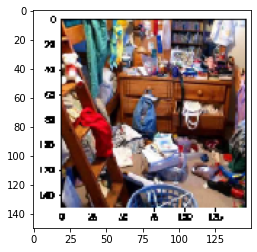

In [15]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes!=0:
   print('messy')
  else:
   print('clean')